In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>

In [8]:
us_income_brackets = [
    (0, 19750, .1),
    (19751,80250, .12),
    (80251,171050,.22),
    (171051,326600,.24),
    (326601,414700,.32),
    (414701,622050,.35),
    (622051,float('inf'),.37)
]

us_ltcg_brackets = [
    (0, 80800,0),
    (80801,501600,.15),
    (501601, float('inf'), .2)]

us_niit_brackets = [(0, 250000, 0), (250001, float("inf"), 0.038)]

ss_brackets = [(0, 142800, 0.062), (142801, float("inf"), 0)]
# ss_brackets = [(0, 137700, 0.062), (137701, float("inf"), 0)]

medicare = 0.0145

additional_medicare = [(0, 250000, 0), (250001, float("inf"), 0.009)]



<IPython.core.display.Javascript object>

In [9]:
def us_tax_calculator(regular_income, capital_gains, fica=False, expat=False):
    taxable_income = regular_income - 24800

    income_tax = 0
    for start, end, rate in us_income_brackets:
        if taxable_income > end:
            income_tax += (end - start) * rate
        else:
            income_tax += (taxable_income - start) * rate
            break

    if income_tax < 0:
        income_tax = 0

    ltcg_tax = 0
    for start, end, rate in us_ltcg_brackets:
        if (taxable_income) > end:
            continue
        else:
            if (capital_gains + taxable_income) > end:
                ltcg_tax += (end - max(start, taxable_income)) * rate
            else:
                ltcg_tax += (
                    capital_gains + taxable_income - max(start, taxable_income)
                ) * rate
                break

    niit_tax = 0
    for start, end, rate in us_niit_brackets:
        if (taxable_income) > end:
            continue
        else:
            if (capital_gains + taxable_income) > end:
                niit_tax += (end - max(start, taxable_income)) * rate
            else:
                niit_tax += (
                    capital_gains + taxable_income - max(start, taxable_income)
                ) * rate
                break

    ltcg_tax += niit_tax

    fica_tax = 0
    if fica:
        for start, end, rate in ss_brackets:
            if regular_income > end:
                fica_tax += (end - start) * rate
            else:
                fica_tax += (regular_income - start) * rate
                break

        fica_tax += regular_income * medicare

        for start, end, rate in additional_medicare:
            if regular_income > end:
                fica_tax += (end - start) * rate
            else:
                fica_tax += (regular_income - start) * rate
                break

    fica_tax *= 2 if expat else 1

    #     print(
    #         f"income tax: ${round(income_tax)}, \
    #         fica_tax: ${round(fica_tax)}, \
    #         capital gains: ${round(ltcg_tax)}"
    #     )

    return round(income_tax + fica_tax + ltcg_tax + niit_tax, 0)

<IPython.core.display.Javascript object>

In [11]:
us_tax_calculator(60000, 15000, fica=True)

8419.0

<IPython.core.display.Javascript object>

In [12]:
eur = 1.17

spain_income_brackets = [
    (0,12450*eur,0.19),
    (12450*eur,20200*eur,0.24),
    (20200*eur, 35200*eur, 0.30),
    (35200*eur, 60000*eur, 0.37),
    (60000*eur, 300000*eur,0.45),
    (300000*eur, float('inf'), 0.47)
]

spain_ltcg_brackets = [
    (0,6000*eur,0.19),
    (6001,50000*eur,0.21),
    (50000*eur, 200000*eur, 0.23),
    (200000*eur,float('inf'),0.26)
]



# https://www.lainformacion.com/economia-negocios-y-finanzas/subida-fiscal-sanchez-iglesias-penalizara-40-por-ciento-ganancias-capital-declaradas-impuesto-renta/2819112/



<IPython.core.display.Javascript object>

In [13]:
def spain_tax_calculator(regular_income, capital_gains):
    taxable_income = regular_income

    income_tax = 0
    for start, end, rate in spain_income_brackets:
        if taxable_income > end:
            income_tax += (end - start) * rate
        else:
            income_tax += (taxable_income - start) * rate
            break

    ltcg_tax = 0
    for start, end, rate in spain_ltcg_brackets:
        if capital_gains > end:
            ltcg_tax += (end - start) * rate
        else:
            ltcg_tax += (capital_gains - start) * rate
            break

    #     print(
    #         f"income tax: ${round(income_tax)}, \
    #         capital gains: ${round(ltcg_tax)}"
    #     )

    return round(income_tax + ltcg_tax, 0)

<IPython.core.display.Javascript object>

In [14]:
income = 60000
gains = 15000

print(us_tax_calculator(income, gains, fica=True, expat=True))
print(spain_tax_calculator(income, gains))

13009.0
20394.0


<IPython.core.display.Javascript object>

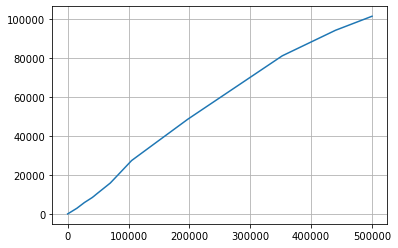

<IPython.core.display.Javascript object>

In [15]:
import matplotlib.pyplot as plt

x = np.linspace(0, 5e5, 201)
y_us = [us_tax_calculator(inc, 0) for inc in x]
y_es = [spain_tax_calculator(inc, 0) for inc in x]
y_diff = [spain_tax_calculator(inc, 0) - us_tax_calculator(inc, 0) for inc in x]

# plt.plot(x, y_us - y_es)
plt.plot(x, y_diff)
plt.grid()
plt.show()

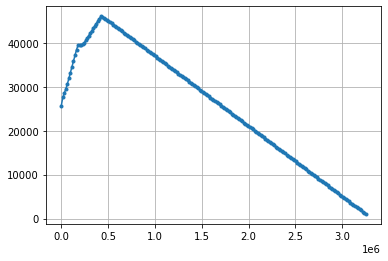

<IPython.core.display.Javascript object>

In [16]:
import matplotlib.pyplot as plt

inc = 100000

x = np.linspace(0, 3.25e6, 201)
y_us = [us_tax_calculator(inc, gains) for gains in x]
y_es = [spain_tax_calculator(inc, gains) for gains in x]
y_diff = [
    spain_tax_calculator(inc, gains) - us_tax_calculator(inc, gains) for gains in x
]

# plt.plot(x, y_us)
# plt.plot(x, y_es)
plt.plot(x, y_diff, marker=".")
plt.grid()
plt.show()